 <h1 align="center"> Dogs vs. Cats </h1>

Dogs vs. Cats es una competencia la cual aun se encuentra en Kaggle vigente, consta de un dataset el cual contiene dos carpetas, una es train la cual contiene 25k imagenes de gatos y perros, las primeras 12500 son de gatos y las siguientes 12500 son de perros. La otra carpeta es la de test, esta contiene 12500 imagenes de gatos y perros. cabe resaltar que son imagenes en formato .jpg y no tienen la misma dimensión.

Este proyecto fué elaborado para clase de Machine Learnig por Edwin Jahir Rueda Rojas ---- Código: 2131432

In [1]:
#Se importan las librerias necesarias para tratar el dataset
%matplotlib inline
from time import time
import glob
import os
import re
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
import numpy as np
import pandas as pd
import PIL
import random
from PIL import Image

C:\Users\Escritorio\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Esta función sirve para ordenar las imagenes al cargarlas, debido a que si las cargaba sin ordenar, al querer mostrar la imagen 10 del dataset, salía la 100, no las mostraba en el oreden que estaban en la carpeta.

In [2]:
def natural_key(string_):
    
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

Directorio de las imagenes.

In [3]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

Se cargan las imagenes, tanto las de train como las de test, observe que en train_all las primeras 12500 son gatos y las siguientes 12500 son perros, como se mencionó anteriormente, tambien se le pasa al parametro 'key' la función para ordenarlas segun su número.

In [4]:
train_cats = sorted(glob.glob(os.path.join(TRAIN_DIR, 'cat*.jpg')), key=natural_key)
train_dogs = sorted(glob.glob(os.path.join(TRAIN_DIR, 'dog*.jpg')), key=natural_key)
train_all = train_cats + train_dogs

test_all = sorted(glob.glob(os.path.join(TEST_DIR, '*.jpg')), key=natural_key)

Mostramos una imagen aleatoria de las de train, observe que cada vez que se ejecuta se muestran caracteristicas de la imagen, como por ejemplo que está en formato .jpg y que la dimensión varia según la imagen.

(23943, './train\\dog.11443.jpg', (499, 375))


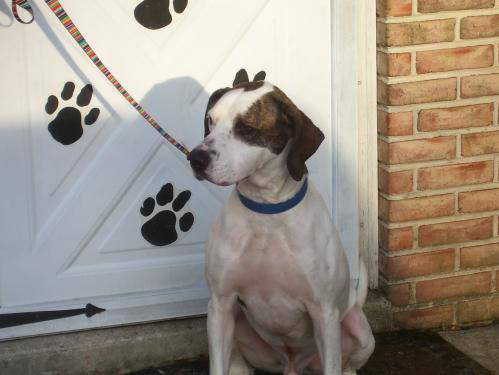

In [5]:
index=int(np.random.random()*25000)
print(index,format(train_all[index]),Image.open(train_all[index]).size)
Image.open(train_all[index])

Debido a que las imagenes no tienen las mismas dimensiones, las volveremos de 100x100, para esto trataremos las imagenes .jpg con PIL y las transformareros en array's para despues añadirlas a una matriz llamada image_p.

In [6]:
tiempo_inicial = time()
t_m=25000
t_r=100
image_p = np.zeros((t_m,100*100))
for i in range(t_m):
    image_p[i]=(np.mean(np.asarray(Image.open(train_all[i]).resize((t_r,t_r)),
                                   dtype=np.float64),axis=2)).reshape(1,t_r**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

471.165999889


In [12]:
image_p.shape

(25000L, 10000L)

Ahora procesaremos las 12500 imagenes de test, tambien las volvemos de 100x100 y procedemos a promediar su color para pasarla a escala de grises.

In [13]:
tiempo_inicial = time()
t_m=12500
t_r=100
image_test=np.zeros((t_m,100*100))
for i in range(t_m):
    image_test[i]=(np.mean(np.asarray(Image.open(test_all[i]).resize((t_r,t_r))
                                      ,dtype=np.float64),axis=2)).reshape(1,t_r**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

198.437000036


Ahora procederemos a entranar con un GaussianNB con las imagenes obetenidas anteriormente. Para efecto de rendimiento de la pc, solo se tomarán 3k imagenes de gatos y 3k de perros con las cuales se entrenará el modelo, las etiquetas se tomarán como kaggle sugiere, 0 si es gato y 1 si es perro.

In [14]:
x_train=np.concatenate((image_p[:3000],image_p[22000:]))
x_train.shape

(6000L, 10000L)

In [15]:
y_train=np.zeros((x_train.shape[0],1))
for i in range(x_train.shape[0]/2,x_train.shape[0]):
    y_train[i]=1

In [17]:
#se cogen las primeras 300 imagenes del test y se les da la etiqueta para luego poder sacar un score
x_test = image_test[:300]
y_test_300=[1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,
0,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,0,0,
0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,
1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,0,0,1,
1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,
1,1,1,0]
len(y_test_300), x_test.shape

(300, (300L, 10000L))

Pintamos algunas imagenes de las 6000  de train las cuales ya hemos procesado, el procesado consistió en redimensionar las imagenes a un tamaño de 100x100, promediando su color para volverlas a escala de gris.

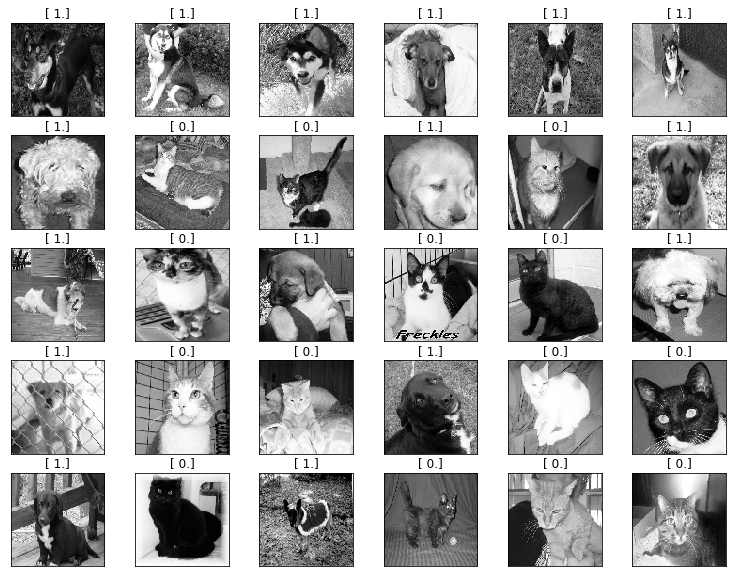

In [25]:
#dibujamos algunas imagenes de train y su respectiva clase
fig = plt.figure(figsize=(13,10))
for i in range(30):
    fig.add_subplot(5,6,(i+1),xticks=[], yticks=[])
    num=int(np.random.random()*6000)
    plt.title("{}".format(y_train[num]))
    plt.imshow(x_train[num].reshape(100,100),cmap = plt.cm.Greys_r)

Como observamos entrenar con todos los pixeles de la imagen no nos brinda un buen score, aunque es mejor que adivinar el cual tendría un 0.5 de score.

In [27]:
#Probamos el GaussianNB, con los pixeles de las imagenes
g = GaussianNB()
g.fit(x_train,y_train)

print ("score en train = ", g.score(x_train, np.ravel(y_train)))
print ("score es test = ", g.score(x_test, np.ravel(y_test_300)))

('score en train = ', 0.57566666666666666)
('score es test = ', 0.58333333333333337)


Ahora predeciremos las etiquetas de las imagenes de test, de las 12500 solo tomaremos las primeras 300 para no afectar el rendimiento de la pc, de las cuales pintaremos 30 con su respectiva predicción.

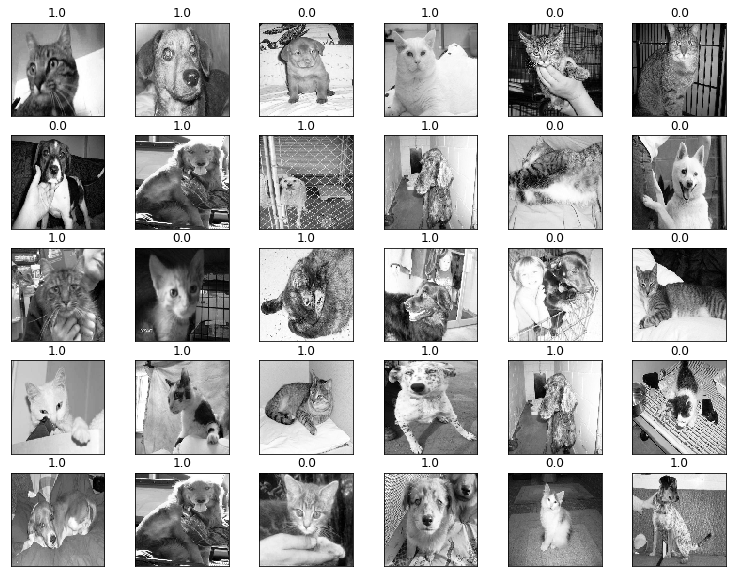

In [28]:
#predecir las etiquetas de las imagenes de test
e_test=g.predict(x_test)
fig = plt.figure(figsize=(13,10))
for i in range(30):
    fig.add_subplot(5,6,(i+1),xticks=[], yticks=[])
    num=int(np.random.random()*300)
    plt.title("{}".format(e_test[num]))
    plt.imshow(image_test[num].reshape(100,100),cmap = plt.cm.Greys_r)

Ahora probaré haciendole un PCA a las imagenes, con 140 componentes, ya que con ese número fue que me arrojó el mejor score, se puede ver que aumenta un poco pero no lo suficiente.

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components =140)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

g.fit(x_train_pca, np.ravel(y_train))

print ("score en train = ", g.score(x_train_pca, np.ravel(y_train)))
print ("score es test = ", g.score(x_test_pca, np.ravel(y_test_300)))

('score en train = ', 0.6243333333333333)
('score es test = ', 0.60333333333333339)


Tambien se prueba un cross_val_score, el cual aumenta un poco el acierto en test pero aun no es lo que se espera.

In [51]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB

print ("score en train = " , np.mean(cross_val_score(GaussianNB(), x_train_pca ,np.ravel(y_train), cv=5 )))
print ("score en test = ",np.mean(cross_val_score(GaussianNB(), x_test_pca ,np.ravel(y_test_300), cv=5 )))

('score en train = ', 0.60316666666666663)
('score en test = ', 0.63029267389089561)


### Imagenes tratadas con OpenCV

Como no se obtuvieron los mejores resultados, se trabajaran las imagenes con opencv para tratarlas un poco más.<br>
Este pre-procesado consiste en quitarle el fondo a las imagenes, tratas de resaltar los perros y los gatos no más.

Para efecto de rendimiento de la pc, solo se trabajará con 2000 en train y 300 en test.

In [52]:
import cv2 

t_m =1000
tiempo_inicial = time()
image_r=np.zeros((t_m,100*100))
for i in range(t_m):
    img = cv2.imread(train_all[i])

    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (50,50,450,290)

    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    image_r[i] = np.mean(cv2.resize(img, (100,100)), axis=2).reshape(1,100**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)


3162.85599995


In [53]:
tiempo_inicial = time()
tm = 1000
for i in range(t_m):
    img = cv2.imread(train_all[20000+i])

    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (50,50,450,290)

    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    image_r = np.concatenate((image_r,np.mean(cv2.resize(img, (100,100)), axis=2).reshape(1,100**2)))
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

3056.3039999


In [54]:
image_r.shape

(2000L, 10000L)

In [55]:
# se crean las etiquetas para las imagenes de train que en este caso se llaman y_image_r
y_image_r=np.zeros((2000,1))
for i in range(1000,2000):
    y_image_r[i]=1
y_image_r.shape

(2000L, 1L)

In [56]:
t_m =300
tiempo_inicial = time()
image_test=np.zeros((t_m,100*100))
for i in range(t_m):
    img = cv2.imread(test_all[i])

    mask = np.zeros(img.shape[:2],np.uint8)

    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (40,40,450,290)

    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]

    image_test[i] = np.mean(cv2.resize(img, (100,100)), axis=2).reshape(1,100**2)
tiempo_final = time()
print(tiempo_final-tiempo_inicial)

901.347000122


In [57]:
image_r.shape , image_test.shape

((2000L, 10000L), (300L, 10000L))

Se muestra una imagen aleatoria procesada anteriormente.

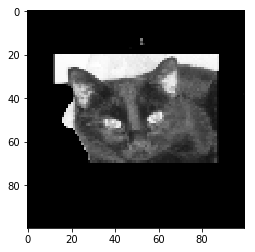

In [88]:
ind = int(np.random.random()*2000)
plt.imshow(image_r[ind].reshape(100,100), cmap = plt.cm.Greys_r)

In [91]:
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import GaussianNB

print ("score en train = ",np.mean(cross_val_score(GaussianNB(), image_r ,np.ravel(y_image_r), cv=5 )))
print ("score en train = ",np.mean(cross_val_score(GaussianNB(), image_test ,np.ravel(y_test_300), cv=5 )))

('score en train = ', 0.53649999999999998)
('score en train = ', 0.61690840048161522)


In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 140)

image_r_pca = pca.fit_transform(image_r)
image_test_pca = pca.fit_transform(image_test)

In [93]:
print(g.score(image_r ,np.ravel(y_image_r)))
print(g.score(image_test ,np.ravel(y_test_300)))

0.5435
0.563333333333


Como observamos no  se obtienen mejores resultados, por eso probaremos con:

## bolsa de palabras visuales

Se extraeran parches visuales de las imagenes de train, para asi poder tratar de ver si el score mejora.

In [95]:
def extract_patches(img, patch_size, step_size, include_empty_patches=False):
    patches = []
    for y in range(0, img.shape[0]-patch_size+1, step_size):
        for x in range(0,img.shape[1]-patch_size+1, step_size):
            patch = img[y:y+patch_size,x:x+patch_size]
            if np.sum(patch!=0):
                patches.append(patch)
    return patches

In [96]:
def get_visual_dictionary(X, patch_size, step_size, dict_size):
    from sklearn.cluster import KMeans
    patches = []
    for img in X:
        patches_in_this_image = extract_patches(img.reshape(100,100),patch_size,step_size)
        for i in patches_in_this_image:
            patches.append(i.flatten())

    cinit = np.zeros((dict_size, patch_size**2))
    km = KMeans(n_clusters=dict_size, init=cinit, n_init=1)#, n_jobs=24)
    km.fit(patches)
    return km.cluster_centers_

6360614.63164


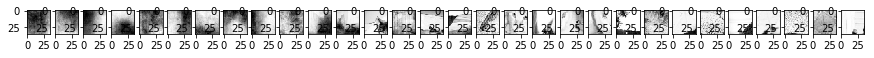

In [97]:
x_train = np.concatenate((image_p[:2000],image_p[23000:]))
patch_size, step_size, dict_size = 35, 35, 30
vwords = get_visual_dictionary(x_train[:100], patch_size, step_size, dict_size)
plt.figure(figsize=(15,15))
vwords = vwords[np.argsort([np.sum(vwords[i]) for i in range(len(vwords))])]
print (np.sum([np.sum(vwords[i]) for i in range(len(vwords))]))
n = len(vwords)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(vwords[i].reshape(patch_size,patch_size),cmap = plt.cm.Greys_r,interpolation="nearest")

In [98]:
def get_closest(patch, dictionary):
    minimos = []
    for i in dictionary:
        minimos.append(np.linalg.norm(np.abs(i.reshape(patch.shape)-patch)))
    return minimos.index(np.min(minimos))

def get_histogram(img, patch_size, step_size, dictionary):
    patches = extract_patches(img,patch_size,step_size)
    histogram = np.zeros(len(dictionary))
    
    for i in patches:
        histogram[get_closest(i,dictionary)] +=1
    return histogram

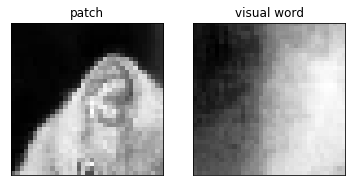

In [99]:
img = x_train[np.random.randint(len(x_train))].reshape(100,100)
patches = extract_patches(img, patch_size, step_size)
patch   = patches[np.random.randint(len(patches))].reshape(patch_size**2)
vword = vwords[get_closest(patch, vwords)]

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(patch.reshape(patch_size, patch_size),  cmap = plt.cm.Greys_r, interpolation="nearest")
plt.title("patch")
plt.xticks([]); plt.yticks([])
plt.subplot(122)
plt.title("visual word")
plt.imshow(vword.reshape(patch_size, patch_size),  cmap = plt.cm.Greys_r, interpolation="nearest")
plt.xticks([]); plt.yticks([]);

1533


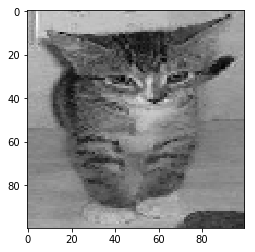

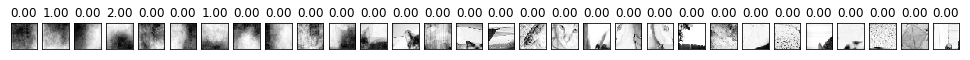

In [100]:
k = np.random.randint(len(x_train))
print (k)
img = x_train[k].reshape(100,100)
h = get_histogram(img, patch_size, step_size, vwords)
plt.imshow(img, cmap = plt.cm.Greys_r, interpolation="nearest")

plt.figure(figsize=(17,3))
n = len(vwords)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(vwords[i].reshape(patch_size,patch_size),cmap = plt.cm.Greys_r)
    plt.title("%.2f"%h[i])
    plt.xticks([]); plt.yticks([])

In [ ]:
#se obtiene el diccionario visual
patch_size, step_size = 10,10
vdict = get_visual_dictionary(x_train, patch_size, step_size, 60)
Xh = [get_histogram(i.reshape(100,100), patch_size, step_size, vdict) for i in x_train]
Xh = np.array(Xh)

In [102]:
y_train=np.zeros((4000,1))
for i in range(2000,4000):
    y_train[i]=1
x_train.shape, y_train.shape

((4000L, 10000L), (4000L, 1L))

Como vemos esta representación aunmenta un poco el score, cabe resaltar que se utilizaron las imagenes sin procesasr, solo las del inicio.

In [118]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

estimator = GaussianNB()
sc = cross_val_score(estimator,x_train,np.ravel(y_train),cv=5)
print ("original pixels                %.3f +/- %.3f"%(np.mean(sc), np.std(sc)))
sc = cross_val_score(estimator, Xh,np.ravel(y_train),cv=5)
print ("bag of features representation %.3f +/- %.3f"%(np.mean(sc), np.std(sc)))

original pixels                0.563 +/- 0.011
bag of features representation 0.572 +/- 0.010


### ahora con las imagenes procesadas con OpenCV

In [104]:
image_r.shape

(2000L, 10000L)

4756750.06204


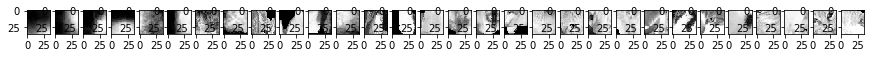

In [105]:
patch_size, step_size, dict_size = 35, 35, 30
vwords = get_visual_dictionary(image_r[:100], patch_size, step_size, dict_size)
plt.figure(figsize=(15,15))
vwords = vwords[np.argsort([np.sum(vwords[i]) for i in range(len(vwords))])]
print (np.sum([np.sum(vwords[i]) for i in range(len(vwords))]))
n = len(vwords)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(vwords[i].reshape(patch_size,patch_size),cmap = plt.cm.Greys_r,interpolation="nearest")

46


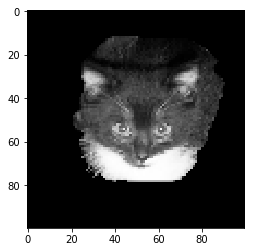

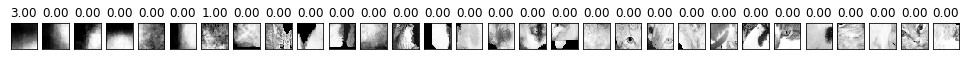

In [106]:
k = np.random.randint(len(image_r))
print (k)
img = image_r[k].reshape(100,100)
h = get_histogram(img, patch_size, step_size, vwords)
plt.imshow(img, cmap = plt.cm.Greys_r, interpolation="nearest")

plt.figure(figsize=(17,3))
n = len(vwords)
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(vwords[i].reshape(patch_size,patch_size),cmap = plt.cm.Greys_r)
    plt.title("%.2f"%h[i])
    plt.xticks([]); plt.yticks([])

In [115]:
#se obtiene el dicionario visual
patch_size, step_size = 25,25
vdict = get_visual_dictionary(image_r, patch_size, step_size, 60)
Xh = [get_histogram(i.reshape(100,100), patch_size, step_size, vdict) for i in image_r]
Xh = np.array(Xh)

In [109]:
y_train_cv=np.zeros((2000,1))
for i in range(1000,2000):
    y_train_cv[i]=1

In [116]:
estimator = GaussianNB()
sc = cross_val_score(estimator,image_r,np.ravel(y_train_cv),cv=5)
print ("original pixels                %.3f +/- %.3f"%(np.mean(sc), np.std(sc)))
sc = cross_val_score(estimator, Xh,np.ravel(y_train_cv),cv=5)
print ("bag of features representation %.3f +/- %.3f"%(np.mean(sc), np.std(sc)))

original pixels                0.536 +/- 0.016
bag of features representation 0.516 +/- 0.019


## Red Neuronal

Ahora probaremos armandon una red neuronal con un modelo de keras.

In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Dense, Activation, Flatten, Dropout, MaxPooling2D
from keras.regularizers import l2
#model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model = Sequential()#probar con border_mode='valid', same , 8 y 6
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(100, 100, 1), activation='relu'))
model.add(Convolution2D(15, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), border_mode='same'))
model.add(Convolution2D(12, 5, 5, border_mode='same', activation='relu'))
model.add(Flatten())
model.add(Dense(output_dim=64, W_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(output_dim=2, W_regularizer=l2(0.01)))  #binary classification
model.add(Activation('softmax'))

In [121]:
#para promediar las imagenes
def average(data):
    minimum = np.min(data)
    maximum = np.max(data)
    data = (data-minimum)/(maximum-minimum)
    data = data - np.mean(data)
    return data

x_train = average(x_train)

In [21]:
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD, RMSprop
#model.compile(loss='binary_crossentropy',
#optimizer=SGD(lr=0.005, momentum=0.9, decay=0.1, nesterov=False), metrics=['accuracy'])
#probar optimzer='admin'
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
labels_ = to_categorical(y_train, 2) #convert labels to a matrix representation 
train_ = np.resize(x_train, (len(x_train), 100, 100, 1))
model.fit(train_, labels_, nb_epoch=20, batch_size=32)

Epoch 1/20
4000/4000 [==============================] - 4216s - loss: 1.7254 - acc: 0.5235   
Epoch 2/20
4000/4000 [==============================] - 4003s - loss: 0.9172 - acc: 0.5985   
Epoch 3/20
4000/4000 [==============================] - 3953s - loss: 0.7794 - acc: 0.6630   
Epoch 4/20
4000/4000 [==============================] - 4003s - loss: 0.6985 - acc: 0.7302   
Epoch 5/20
4000/4000 [==============================] - 3904s - loss: 0.6219 - acc: 0.7812   
Epoch 6/20
4000/4000 [==============================] - 3966s - loss: 0.5403 - acc: 0.8250   
Epoch 7/20
4000/4000 [==============================] - 3866s - loss: 0.4773 - acc: 0.8590   
Epoch 8/20
4000/4000 [==============================] - 3873s - loss: 0.4187 - acc: 0.8928   
Epoch 9/20
4000/4000 [==============================] - 3846s - loss: 0.3705 - acc: 0.9170   
Epoch 10/20
4000/4000 [==============================] - 3855s - loss: 0.3312 - acc: 0.9365   
Epoch 11/20
4000/4000 [==============================] - 39

In [23]:
test_labels_ = to_categorical(c_test_300, 2)
test_ = image_test[:300]
test_ = np.resize(test_,(len(test_), 100, 100, 1))
print("score test =", model.evaluate(test_, test_labels_, verbose=False)[1])
print("score train =", model.evaluate(train_, labels_, verbose=False)[1])

score test = 0.720000000795
score train = 0.9995


In [125]:
%run -i Learn_curve.py
%matplotlib inline

### Curvas de aprendizaje

<module 'matplotlib.pyplot' from 'C:\Users\Escritorio\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

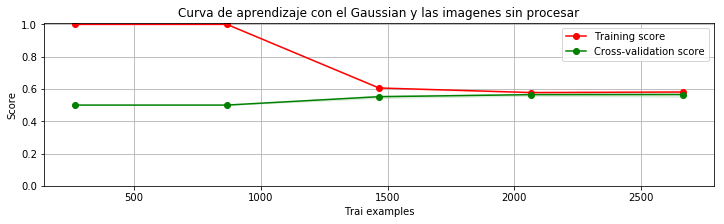

In [131]:
g = GaussianNB()
y_lim=(0,1.01)
title = "Curva de aprendizaje con el Gaussian y las imagenes sin procesar"
plot_learning_curve(g, title , x_train, np.ravel(y_train), ylim=y_lim)

<module 'matplotlib.pyplot' from 'C:\Users\Escritorio\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

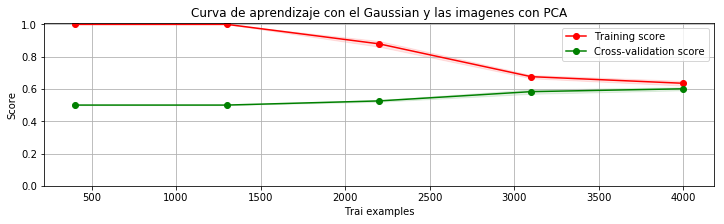

In [139]:
g = GaussianNB()
y_train_pca=np.zeros((6000,1))
for i in range(3000,6000):
    y_train_pca[i]=1
y_lim=(0,1.01)
title = "Curva de aprendizaje con el Gaussian y las imagenes con PCA"
plot_learning_curve(g, title , x_train_pca, np.ravel(y_train_pca), ylim=y_lim)

<module 'matplotlib.pyplot' from 'C:\Users\Escritorio\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

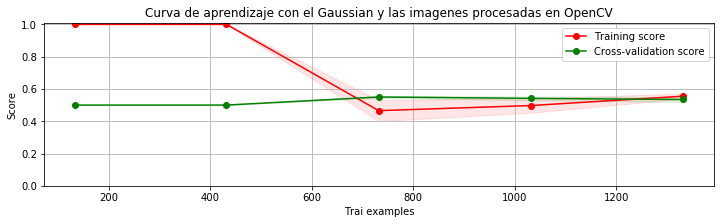

In [141]:
g = GaussianNB()
y_train_pca=np.zeros((6000,1))
for i in range(3000,6000):
    y_train_pca[i]=1
y_lim=(0,1.01)
title = "Curva de aprendizaje con el Gaussian y las imagenes procesadas en OpenCV"
plot_learning_curve(g, title , image_r, np.ravel(y_image_r), ylim=y_lim)

<module 'matplotlib.pyplot' from 'C:\Users\Escritorio\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

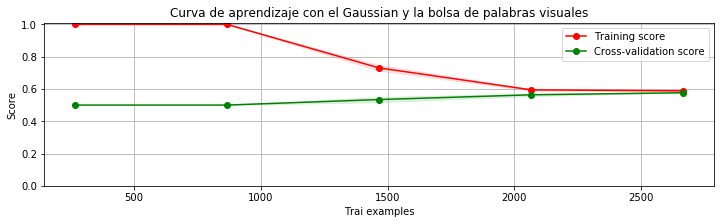

In [146]:
g = GaussianNB()
y_train_pca=np.zeros((6000,1))
for i in range(3000,6000):
    y_train_pca[i]=1
y_lim=(0,1.01)
title = "Curva de aprendizaje con el Gaussian y la bolsa de palabras visuales"
plot_learning_curve(g, title , Xh, np.ravel(y_train), ylim=y_lim)

## Conslusiones

1. <p>Podemos concluir que tartar de predecir las imagenes sin haberles hecho un previo procesado, no nos es muy útil,
como vimos, el score obtenido sin hacerle un pre-procesado a la imagen fue de 0.58 para el test.<br></p>
2. <p>Se hizo un PCA a las imagenes, el cual nos arrojó un score de 0.63 para test, esto nos indica que el PCA mejoró la clasificación pero no lo suficiente.<br></p>
3. Se trato de procesar las imagenes con OpenCV a ver si esto arrojaba mejores resultados, lo que se quizo hacer fue tratar
de quitar el fondo, para así resaltar tanto los perros como los gatos, debido a esto tiene cierto error al tratar de borrar 
el fondo, no se cumplió con el objeto, este intento arrojó un score del 0.56 para test.<br>
4. Tambien se trató de hacer una bolsa de palabras visuales, tanto para las imagenes sin procesar, como para las imagenes procesadas con OpenCV, esto tampoco trajo buenos resultados, tal vez porque las palabras visuales no eran tan diferentes
tanto para los perros como para los gatos.<br>
5. Por ultimo se probó una red neuronal elaborada con el modelo de keras, debido a que estas redes requieren de una maquina
potente, se trabajó con pocas imágenes, obteniendo aqui el mejor score de test, siendo un 0.72, pero se ve muy claro el overfitting, ya que para los datos de train es 0.9995.<br>
6. Yo creeria que aunmentando el número de imagenes para entrenar la red, y añadiendo una capa más aumentaria el score para test, esta prueba no se llevó a cabo debido a la demora en tiempo de ejecución, pues la red planteada anteriormente duró un
día en ejecución.